https://community.home-assistant.io/t/setting-up-mysql-on-a-synology-nas-docker-container/16253/3

http://nbviewer.jupyter.org/github/home-assistant/home-assistant-notebooks/tree/master/

https://stackoverflow.com/questions/37730243/importing-data-from-a-mysql-database-into-a-pandas-data-frame-including-column-n

https://github.com/PyMySQL/PyMySQL

useful commands https://github.com/arsaboo/homeassistant-config/blob/master/HASS%20Cheatsheet.md#setting-up-mysql

Hass examples http://nbviewer.jupyter.org/github/home-assistant/home-assistant-notebooks/tree/master/ uses SQLalchemy

In [24]:
import pymysql.cursors
import pandas as pd
%matplotlib inline
from datetime import datetime, timedelta

In [ ]:
# Connect to the database
connection = pymysql.connect(host='192.168.0.30',
                             user='hass',
                             password='12345',
                             db='homeassistant',
                             charset='utf8',  # 'utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)

In [2]:
df = pd.read_sql('SELECT * FROM homeassistant.states', con=connection)  # Takes 30 seconds to read

In [3]:
df.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created
0,1,group,group.default_view,unknown,"{""entity_id"": [""device_tracker.robins_iphone"",...",None,2017-10-30 05:45:59,2017-10-30 05:45:59,2017-10-30 05:46:27
1,2,group,group.next_train_to_wim_group,unknown,"{""entity_id"": [""sensor.next_train_to_wim""], ""o...",None,2017-10-30 05:45:59,2017-10-30 05:45:59,2017-10-30 05:46:27
2,3,group,group.traintimes,unknown,"{""entity_id"": [""group.next_train_to_wim_group""...",None,2017-10-30 05:45:59,2017-10-30 05:45:59,2017-10-30 05:46:27
3,4,group,group.controls,unknown,"{""entity_id"": [""input_select.robin_loc_selecto...",None,2017-10-30 05:45:59,2017-10-30 05:45:59,2017-10-30 05:46:27
4,5,group,group.weather,unknown,"{""entity_id"": [""sensor.darksky_sensor_summary""...",None,2017-10-30 05:45:59,2017-10-30 05:45:59,2017-10-30 05:46:27


In [4]:
for entity_id in df['entity_id'].unique():
    print(entity_id)

group.default_view
group.next_train_to_wim_group
group.traintimes
group.controls
group.weather
group.travel
group.sensors
group.bme680
group.blink
group.cameras
group.scripts
group.family
group.hue
sun.sun
zone.home
zone.waterloo
zone.redhill
zone.work
binary_sensor.in_bed_bayesian
binary_sensor.motion_at_home
alarm_control_panel.ha_alarm
sensor.bedroom_temperature
sensor.next_train_status
sensor.living_room_temperature
sensor.merton_pm10
sensor.next_train_in
sensor.next_train_scheduled
sensor.hall_temperature
sensor.next_train_estimated
sensor.mean_temperature
input_select.robin_loc_selector
sensor.time
sensor.date
sensor.date__time
sensor.time__date
script.activate_hue_remote_python
script.external_ip_script
script.maria_commute_script
script.doorbell_pressed_script
script.activate_my_early_train_python
script.activate_hello_world_python
script.dev_publish_on_script
script.ifttt_boil_kettle
script.activate_train_state_python
script.robin_work_to_home_script
script.activate_home_tempe

In [19]:
query = "SELECT entity_id, COUNT(*) FROM states \
GROUP BY entity_id ORDER by 2 DESC"
print("Performing a query: {}".format(query))

main_df = pd.read_sql(query, con=connection)  # Takes 30 seconds to read

Performing a query: SELECT entity_id, COUNT(*) FROM states GROUP BY entity_id ORDER by 2 DESC


In [20]:
main_df

,entity_id,COUNT(*)
0,sensor.bme680humidity,243443
1,sensor.bme680air_qual,139582
2,sensor.bme680pressure,133723
3,sensor.bme680temperature,18756
4,sun.sun,7305
5,sensor.date__time,7293
6,sensor.time,7293
7,sensor.time__date,7293
8,sensor.next_train_to_wim,3757
9,sensor.next_train_in,3755


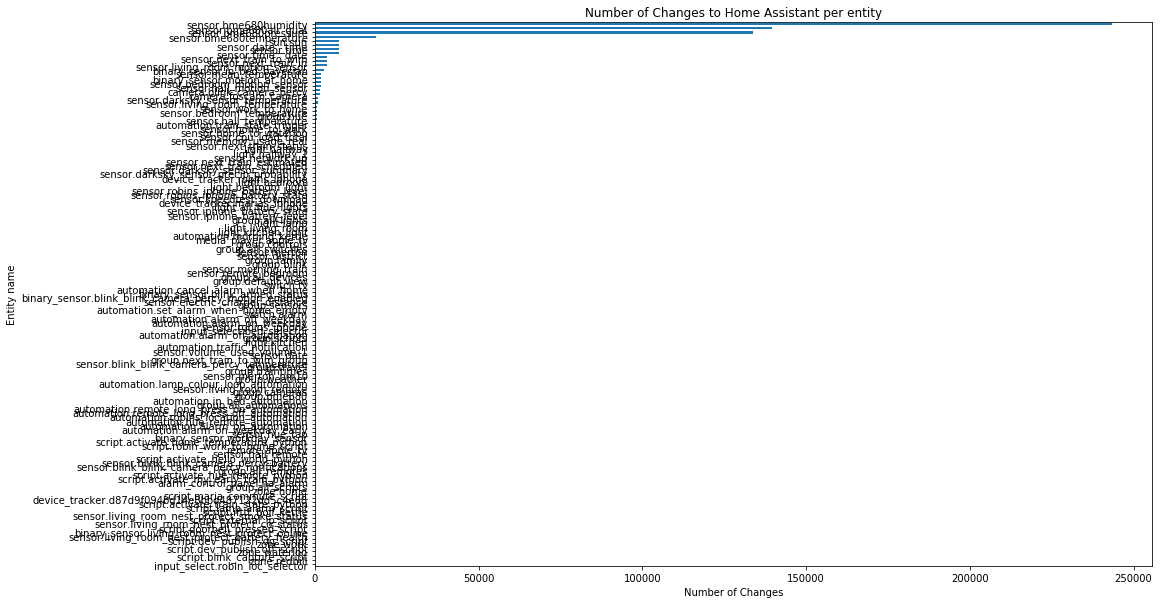

In [23]:
main_df.columns = ['entity', 'Number of Changes']

# setting the entity name as an index of a new dataframe and sorting it \
# by the Number of Changes
ordered_indexed_df = main_df.set_index(['entity']).\
    sort_values(by='Number of Changes')

# displaying the data as a horizontal bar plot with a title and no legend
changesplot = ordered_indexed_df.plot(kind='barh', title='Number of Changes \
to Home Assistant per entity', figsize=(15, 10), legend=False)

# specifying labels for the X and Y axes
changesplot.set_xlabel('Number of Changes')
changesplot.set_ylabel('Entity name')

In [25]:
stmt = text("SELECT * FROM states where last_changed>=:date_filter")

# bind parameters to the stmt value, specifying the date_filter to be 10 days \
# before today
stmt = stmt.bindparams(date_filter=datetime.now()-timedelta(days=20))

NameError: name 'text' is not defined